In [1]:
!pip install opendatasets

In [25]:
# import library to project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as op

from sklearn.preprocessing import  LabelEncoder ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix ,f1_score ,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score , precision_score ,accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
# download the dataset
op.download("https://www.kaggle.com/datasets/arbaaztamboli/loan-approval-dataset")

Skipping, found downloaded files in "./loan-approval-dataset" (use force=True to force download)


In [9]:
# read the dataset
data = pd.read_csv("/content/loan-approval-dataset/Loan Dataset.csv")
data.head()

Applicant_ID  Gender  Age Marital_Status  Dependents     Education  \
0             1  Female   25        Married           2      Graduate   
1             2    Male   36        Married           2   High School   
2             3    Male   43         Single           0  Postgraduate   
3             4  Female   28        Married           0   High School   
4             5  Female   32         Single           0      Graduate   

  Employment_Status Occupation_Type Residential_Status City/Town  ...  \
0          Employed        Business                Own     Urban  ...   
1          Employed        Business                Own  Suburban  ...   
2     Self-Employed      Freelancer                Own     Urban  ...   
3     Self-Employed      Freelancer               Rent  Suburban  ...   
4          Employed        Salaried               Rent  Suburban  ...   

   Loan_Amount_Requested  Loan_Term  Loan_Purpose  Interest_Rate  Loan_Type  \
0                  24535        209          Home           4.27    Secured   
1                   8288         33          Home          14.78  Unsecured   
2                  10308        159       Vehicle          12.33    Secured   
3                  33937         39      Personal           8.77    Secured   
4                  23360         34          Home           9.04  Unsecured   

   Co-Applicant  Bank_Account_History  Transaction_Frequency  Default_Risk  \
0           Yes                     8                     20          0.81   
1           Yes                     9                      9          0.17   
2           Yes                     7                     27          0.25   
3            No                     9                     16          0.27   
4            No                     1                     17          0.32   

  Loan_Approval_Status  
0                    1  
1                    0  
2                    0  
3                    1  
4                    1  

[5 rows x 27 columns]

In [10]:
data.describe()

Applicant_ID           Age    Dependents  Annual_Income  \
count  52000.000000  52000.000000  52000.000000   52000.000000   
mean   26000.500000     38.898385      1.498000   83588.474404   
std    15011.251336     10.553928      1.118077   35720.851522   
min        1.000000     18.000000      0.000000   20009.000000   
25%    13000.750000     31.000000      0.000000   55564.000000   
50%    26000.500000     38.000000      1.000000   78839.000000   
75%    39000.250000     45.000000      2.000000  114226.000000   
max    52000.000000     69.000000      3.000000  149998.000000   

       Monthly_Expenses  Credit_Score  Existing_Loans  \
count      52000.000000  52000.000000    52000.000000   
mean        2748.064885    678.089019        0.997865   
std         1295.678763    159.990367        0.815586   
min          500.000000    300.000000        0.000000   
25%         1636.000000    553.000000        0.000000   
50%         2739.000000    742.000000        1.000000   
75%         3866.000000    796.000000        2.000000   
max         4999.000000    849.000000        2.000000   

       Total_Existing_Loan_Amount  Outstanding_Debt  Loan_History  \
count                52000.000000      52000.000000  52000.000000   
mean                 24939.087962      14984.864923      0.198596   
std                  14407.886552       8663.404305      0.398947   
min                      0.000000          0.000000      0.000000   
25%                  12498.000000       7511.750000      0.000000   
50%                  24964.000000      14984.500000      0.000000   
75%                  37399.500000      22432.250000      0.000000   
max                  49999.000000      29998.000000      1.000000   

       Loan_Amount_Requested     Loan_Term  Interest_Rate  \
count           52000.000000  52000.000000   52000.000000   
mean            21102.765481    125.827019       9.253494   
std              8224.940906     65.509959       3.318356   
min              5000.000000     12.000000       3.500000   
25%             16941.750000     69.000000       6.400000   
50%             21039.000000    126.000000       9.240000   
75%             25809.000000    182.000000      12.140000   
max             44848.000000    239.000000      15.000000   

       Bank_Account_History  Transaction_Frequency  Default_Risk  \
count          52000.000000           52000.000000  52000.000000   
mean               4.503923              17.031808      0.500204   
std                2.872721               7.212011      0.289939   
min                0.000000               5.000000      0.000000   
25%                2.000000              11.000000      0.250000   
50%                5.000000              17.000000      0.500000   
75%                7.000000              23.000000      0.750000   
max                9.000000              29.000000      1.000000   

       Loan_Approval_Status  
count          52000.000000  
mean               0.641654  
std                0.479519  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                52000 non-null  int64  
 1   Gender                      52000 non-null  object 
 2   Age                         52000 non-null  int64  
 3   Marital_Status              52000 non-null  object 
 4   Dependents                  52000 non-null  int64  
 5   Education                   52000 non-null  object 
 6   Employment_Status           52000 non-null  object 
 7   Occupation_Type             52000 non-null  object 
 8   Residential_Status          52000 non-null  object 
 9   City/Town                   52000 non-null  object 
 10  Annual_Income               52000 non-null  int64  
 11  Monthly_Expenses            52000 non-null  int64  
 12  Credit_Score                52000 non-null  int64  
 13  Existing_Loans              520

In [12]:
data.isna().sum()

Applicant_ID                  0
Gender                        0
Age                           0
Marital_Status                0
Dependents                    0
Education                     0
Employment_Status             0
Occupation_Type               0
Residential_Status            0
City/Town                     0
Annual_Income                 0
Monthly_Expenses              0
Credit_Score                  0
Existing_Loans                0
Total_Existing_Loan_Amount    0
Outstanding_Debt              0
Loan_History                  0
Loan_Amount_Requested         0
Loan_Term                     0
Loan_Purpose                  0
Interest_Rate                 0
Loan_Type                     0
Co-Applicant                  0
Bank_Account_History          0
Transaction_Frequency         0
Default_Risk                  0
Loan_Approval_Status          0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.drop('Applicant_ID', axis=1, inplace=True)

# **Visualization**

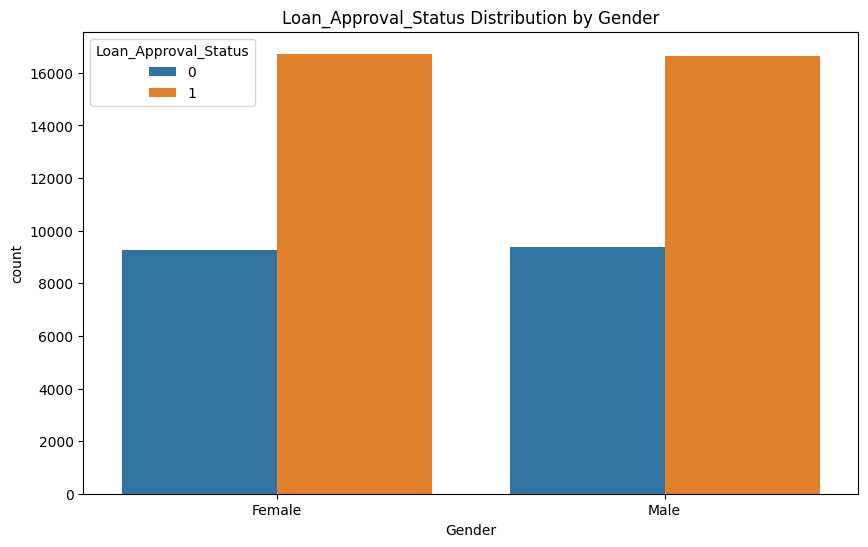

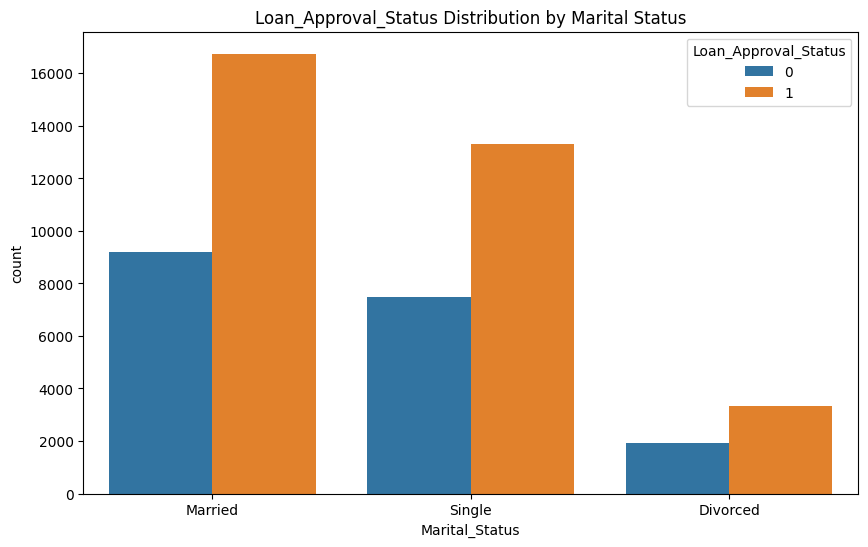

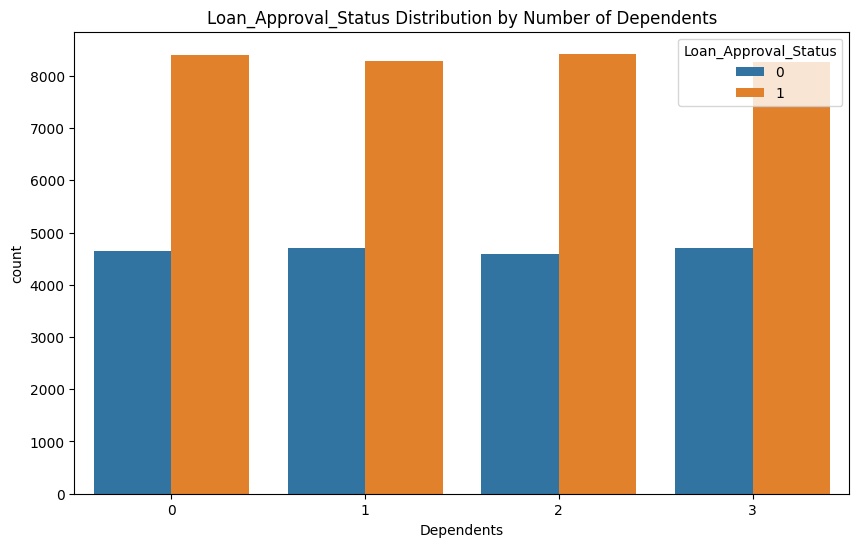

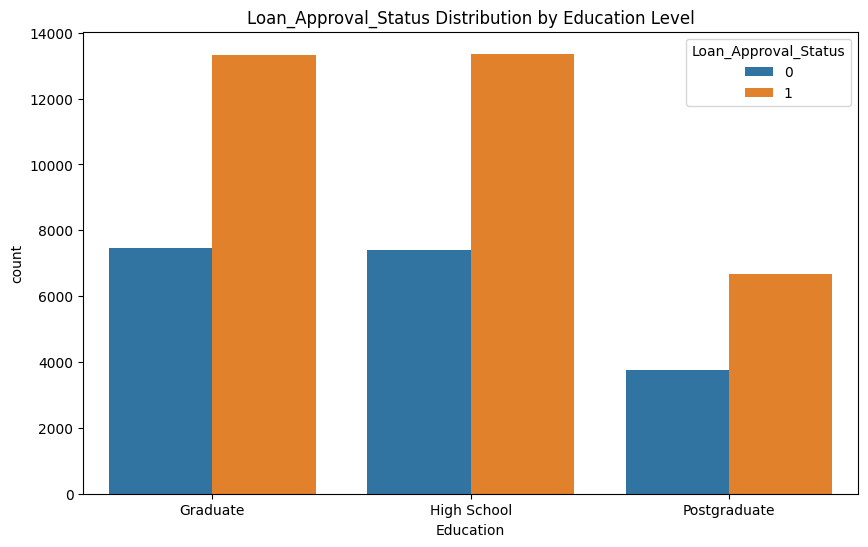

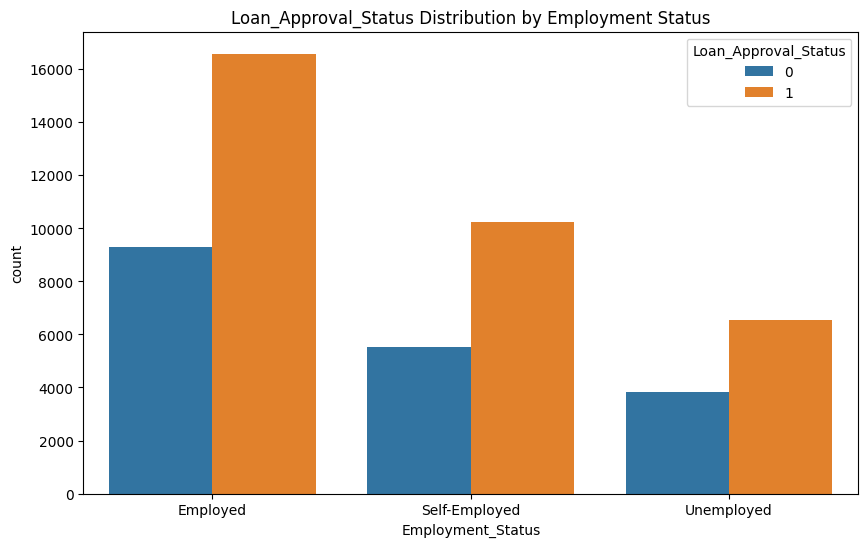

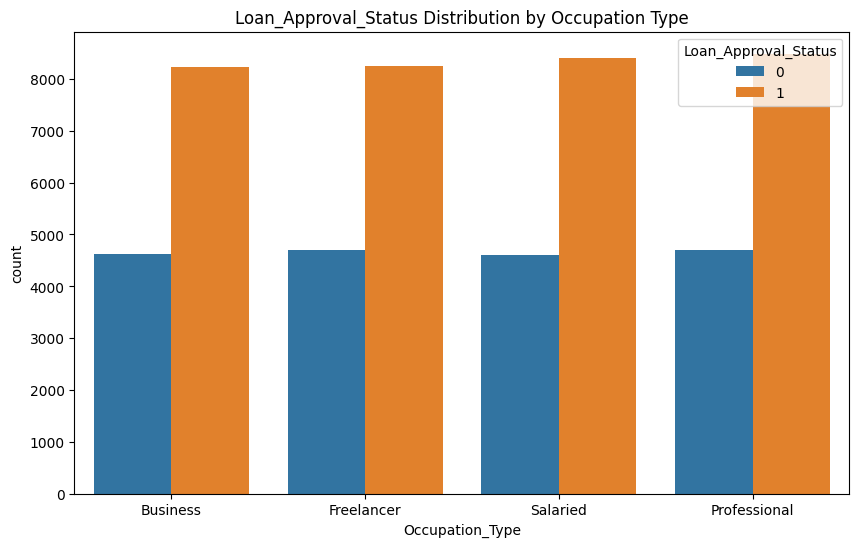

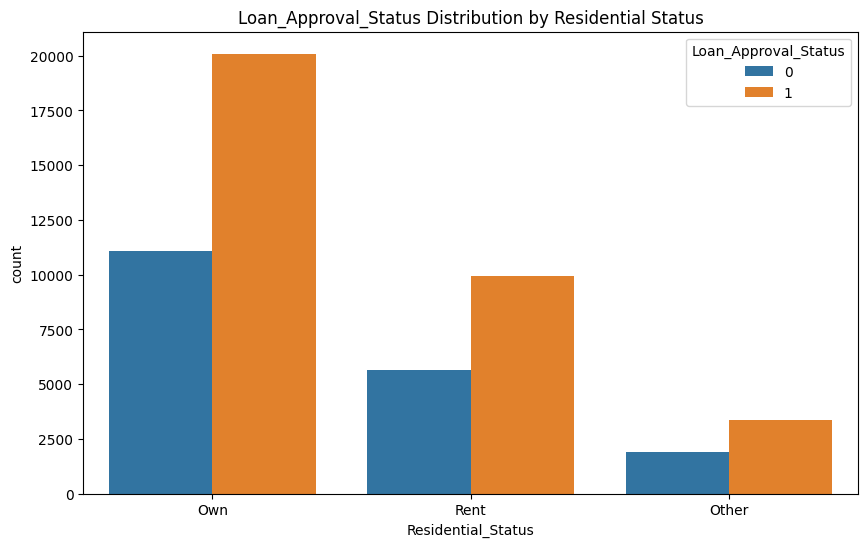

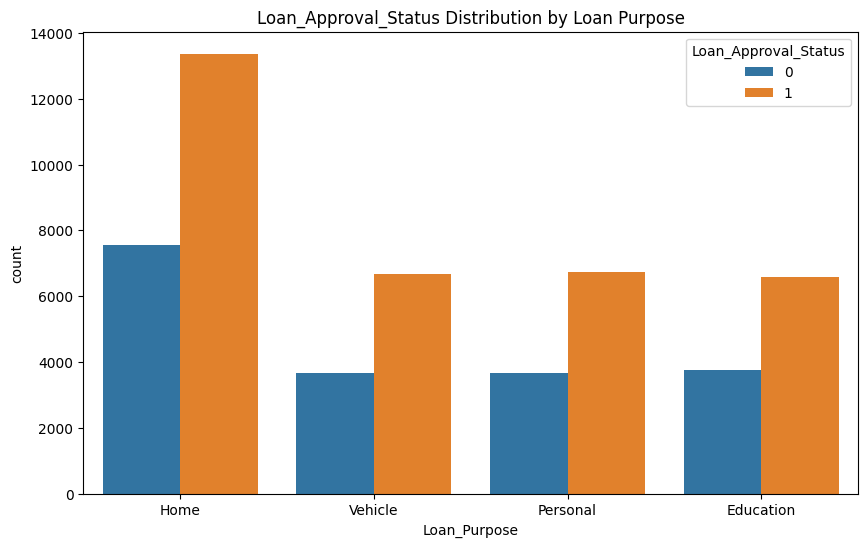

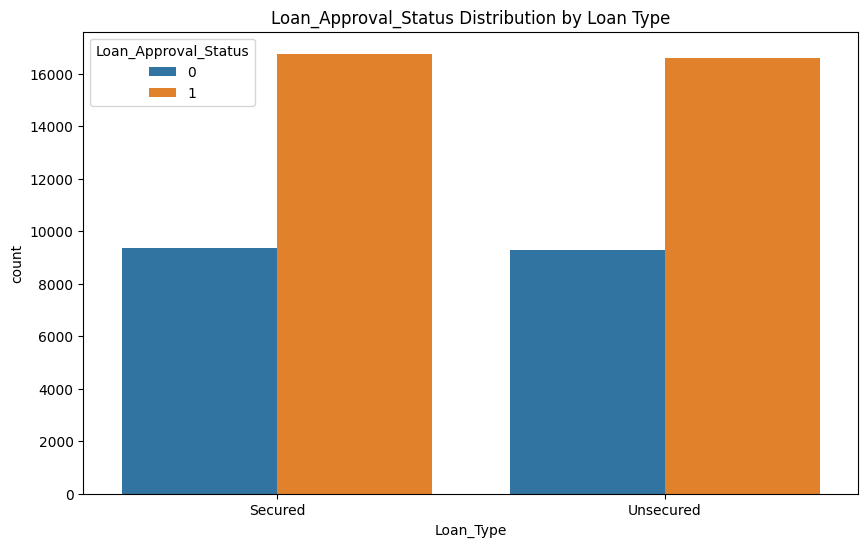

In [15]:
target_col = 'Loan_Approval_Status'

# Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Gender')
plt.show()

# Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Marital Status')
plt.show()

# Dependents
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Number of Dependents')
plt.show()

# Education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Education Level')
plt.show()

# Employment Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment_Status', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Employment Status')
plt.show()

# Occupation Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation_Type', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Occupation Type')
plt.show()

# Residential Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Residential_Status', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Residential Status')
plt.show()

# Loan Purpose
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Purpose', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Loan Purpose')
plt.show()

# Loan Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Type', hue=target_col, data=data)
plt.title(f'{target_col} Distribution by Loan Type')
plt.show()




In [16]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

rows = math.ceil(len(num_cols) / 3)

fig = make_subplots(
    rows=rows,
    cols=3,
    subplot_titles=num_cols
)

for i, col in enumerate(num_cols, 1):
    row = math.ceil(i / 3)
    col_pos = (i - 1) % 3 + 1
    fig.add_trace(
        go.Box(y=data[col], name=col),
        row=row, col=col_pos
    )

fig.update_layout(
    height=350 * rows,
    title_text="Numerical Variables Boxplots",
    showlegend=False
)

fig.show()


**LabelEncoding**

In [17]:
# to convert object to int or float number
le = LabelEncoder()

for x in data.columns:
  if data[x].dtype == 'object':
    data[x] = le.fit_transform(data[x])

data.head()

Gender  Age  Marital_Status  Dependents  Education  Employment_Status  \
0       0   25               1           2          0                  0   
1       1   36               1           2          1                  0   
2       1   43               2           0          2                  1   
3       0   28               1           0          1                  1   
4       0   32               2           0          0                  0   

   Occupation_Type  Residential_Status  City/Town  Annual_Income  ...  \
0                0                   1          2         139901  ...   
1                0                   1          1          21162  ...   
2                1                   1          2          27815  ...   
3                1                   2          1         137853  ...   
4                3                   2          1          81753  ...   

   Loan_Amount_Requested  Loan_Term  Loan_Purpose  Interest_Rate  Loan_Type  \
0                  24535        209             1           4.27          0   
1                   8288         33             1          14.78          1   
2                  10308        159             3          12.33          0   
3                  33937         39             2           8.77          0   
4                  23360         34             1           9.04          1   

   Co-Applicant  Bank_Account_History  Transaction_Frequency  Default_Risk  \
0             1                     8                     20          0.81   
1             1                     9                      9          0.17   
2             1                     7                     27          0.25   
3             0                     9                     16          0.27   
4             0                     1                     17          0.32   

   Loan_Approval_Status  
0                     1  
1                     0  
2                     0  
3                     1  
4                     1  

[5 rows x 26 columns]

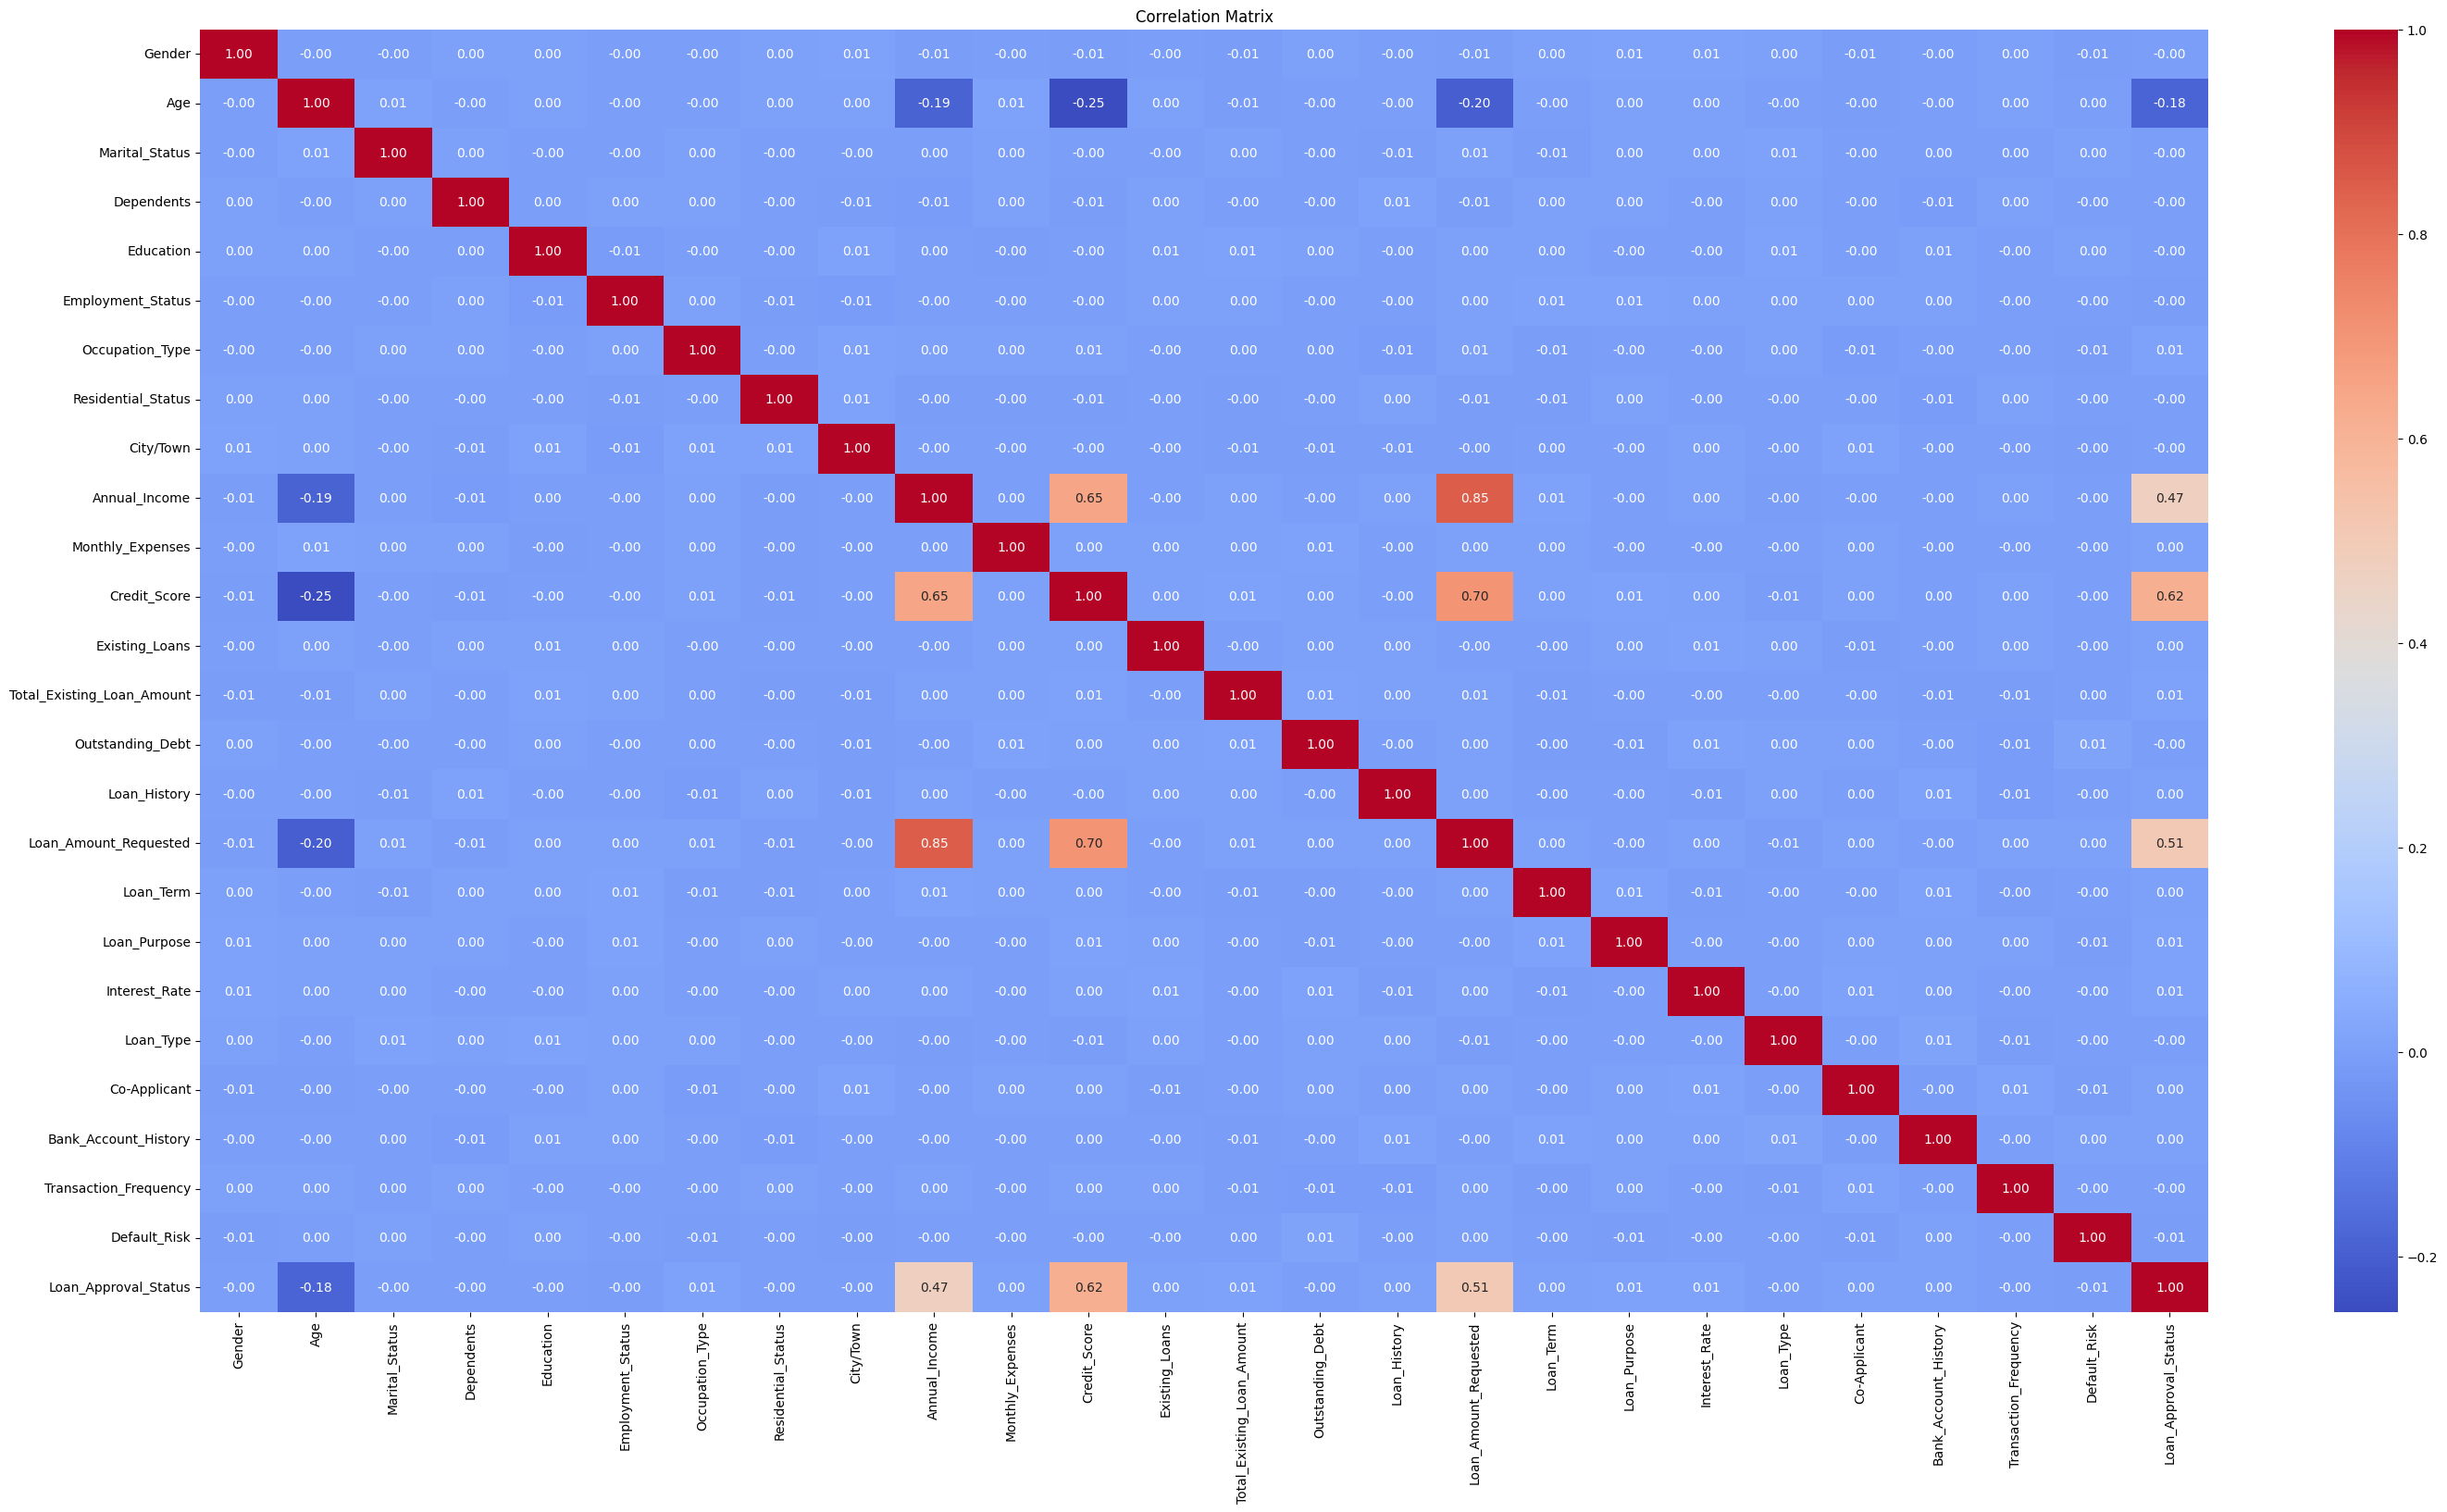

In [18]:
# correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(35, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Outliers**

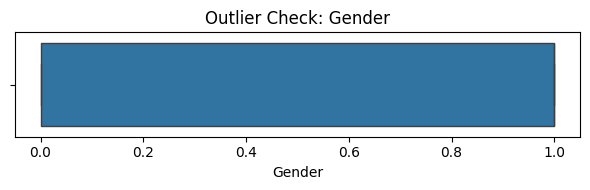

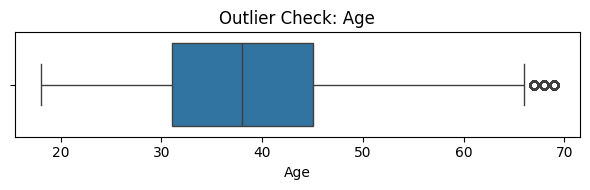

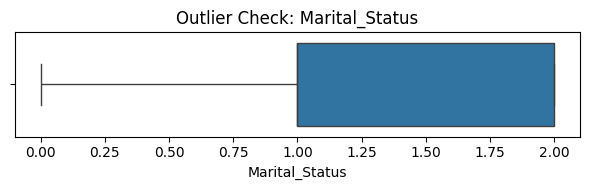

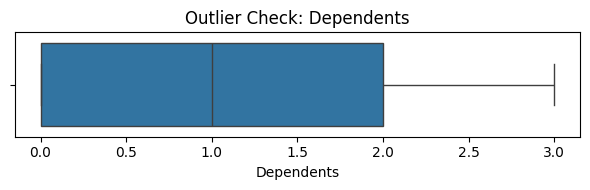

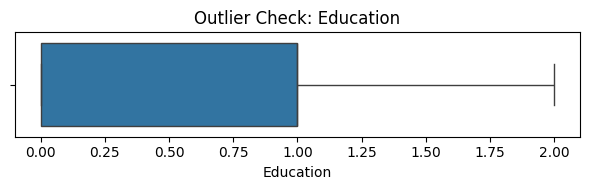

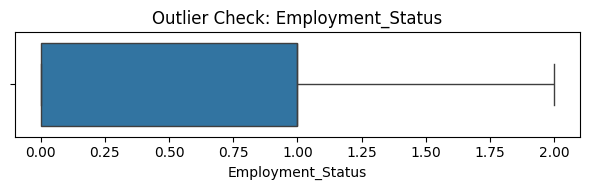

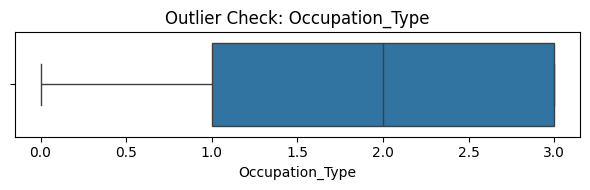

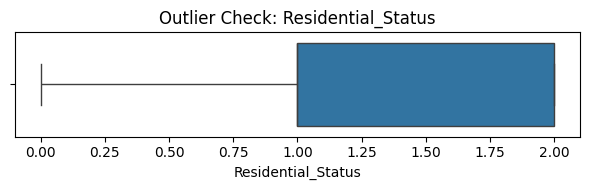

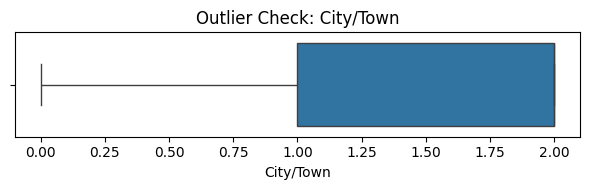

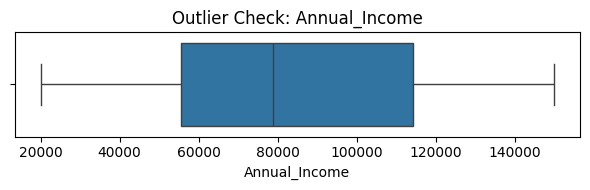

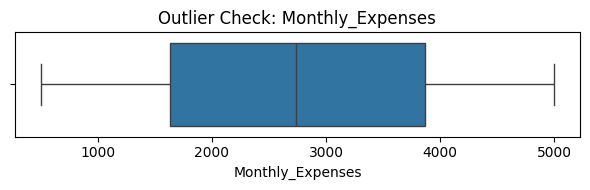

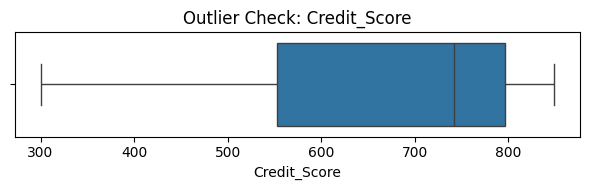

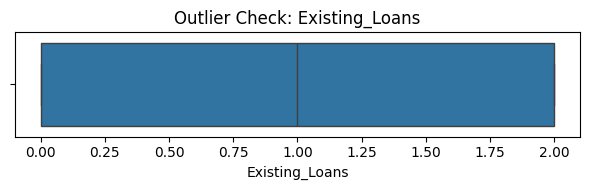

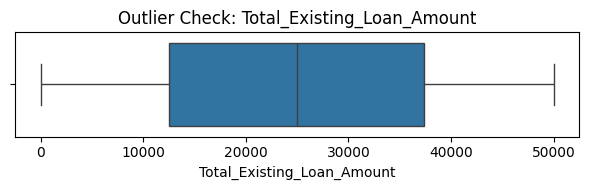

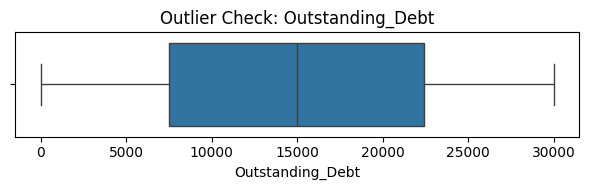

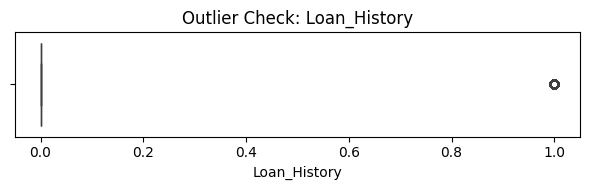

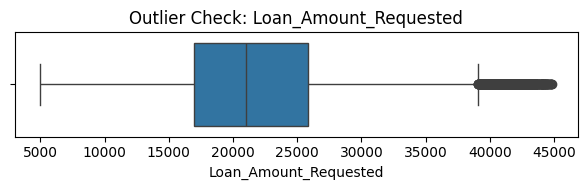

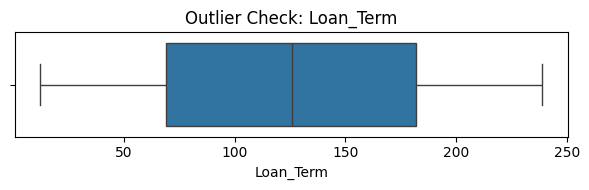

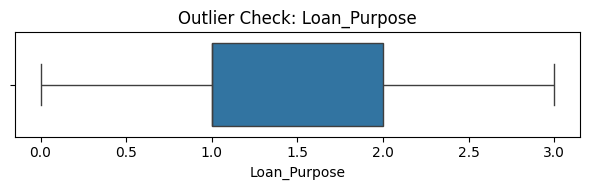

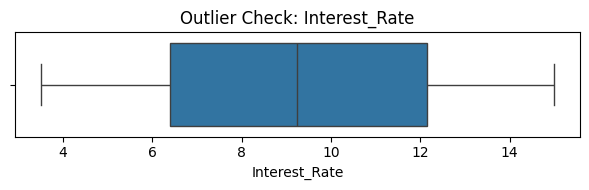

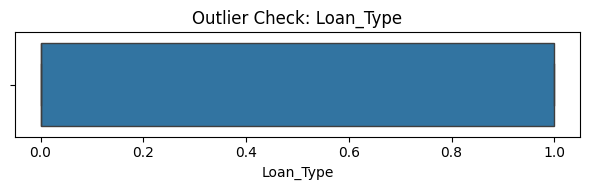

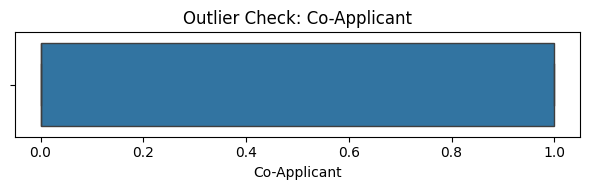

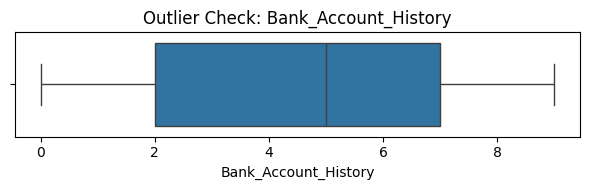

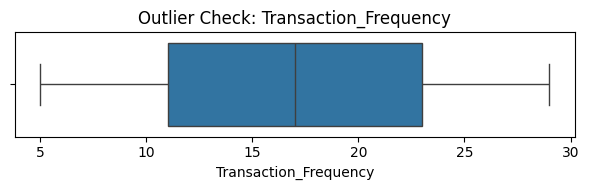

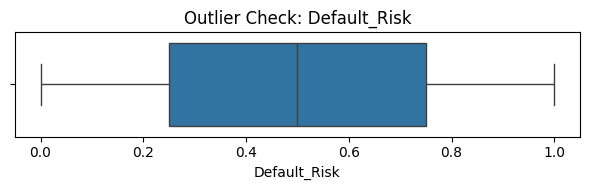

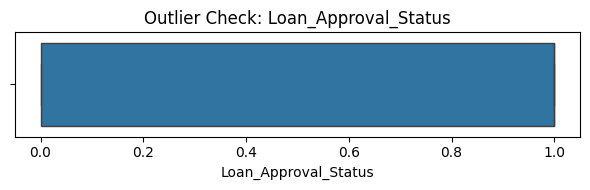

In [19]:
#show boxplot
for col in data:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=data, x=col)
    plt.title(f"Outlier Check: {col}")
    plt.tight_layout()
    plt.show()

In [20]:
# Remove outliers using IQR
numerical_cols = data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) | (data[col] <= upper_bound)]

print("Shape of data after outlier removal:", data.shape)

Shape of data after outlier removal: (52000, 26)


## **Model**

In [22]:
x = data.drop('Loan_Approval_Status', axis=1)
y = data['Loan_Approval_Status']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**LogisticRegression**

In [27]:
# make model LogisticRegression
logic_model = LogisticRegression(
                                     max_iter=500,
                                     penalty='l2',
                                     C=2.0,
                                     solver='lbfgs',
                                     class_weight='balanced',
                                     random_state=42)
logic_model.fit(x_train, y_train)

y_pred = logic_model.predict(x_test)
x_pred = logic_model.predict(x_train)

print("Training Accuracy: ", accuracy_score(y_train, x_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Training Accuracy:  0.8485576923076923
Testing Accuracy:  0.8557692307692307
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      3603
           1       0.86      0.93      0.89      6797

    accuracy                           0.86     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.86      0.86      0.85     10400



ROC-AUC Score: 0.8209


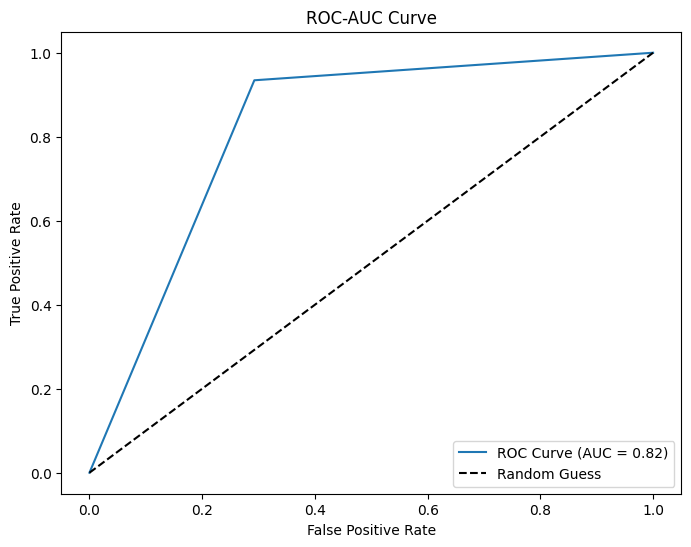

In [28]:
# Roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

**DecisionTree**

In [29]:
# make model DecisionTreeClassifier
DecisionTree_model = DecisionTreeClassifier(

    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=4,
    max_features=22,

)

DecisionTree_model.fit(x_train, y_train)

y_pred = DecisionTree_model.predict(x_test)
x_pred = DecisionTree_model.predict(x_train)

print(f"Train Accuracy: {DecisionTree_model.score(x_train, y_train):.2%}")
print(f"Test Accuracy: {DecisionTree_model.score(x_test, y_test):.2%}")

print(classification_report(y_test, y_pred))

Train Accuracy: 86.11%
Test Accuracy: 83.72%
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      3603
           1       0.85      0.91      0.88      6797

    accuracy                           0.84     10400
   macro avg       0.83      0.80      0.81     10400
weighted avg       0.84      0.84      0.83     10400



ROC-AUC Score: 0.8030


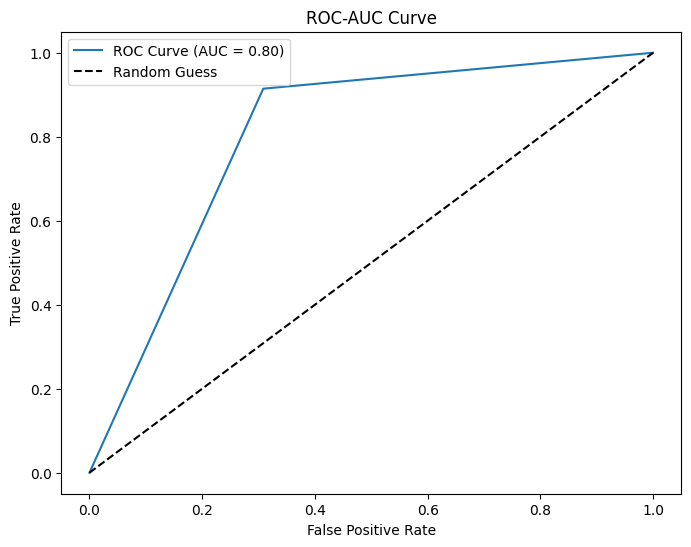

In [30]:
# Roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

**GridSearchCV rith DecisionTree**

In [75]:
from sklearn.model_selection import GridSearchCV

# 1. Hyperparameter tuning with GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 8, 9, 10, 12, 15],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

model = DecisionTreeClassifier()

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring ='accuracy' ,
    n_jobs=-1
)

# 2. Train
grid_search.fit(x_train, y_train)

# 3. Best parameters
print("Best Parameters:", grid_search.best_params_)

# 4. Predict
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)

# 5. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8513827862496769
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2641
           1       0.85      0.94      0.89      5097

    accuracy                           0.85      7738
   macro avg       0.85      0.81      0.83      7738
weighted avg       0.85      0.85      0.85      7738



**RandomForest**

In [31]:
randomforest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=4,
    max_features=22,
    random_state=42
)

randomforest_model.fit(x_train, y_train)

y_pred = randomforest_model.predict(x_test)
x_pred = randomforest_model.predict(x_train)

print(f"Train Accuracy: {randomforest_model.score(x_train, y_train):.2%}")
print(f"Test Accuracy: {randomforest_model.score(x_test, y_test):.2%}")

print(classification_report(y_test, y_pred))

Train Accuracy: 84.94%
Test Accuracy: 85.58%
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      3603
           1       0.86      0.93      0.89      6797

    accuracy                           0.86     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.86      0.86      0.85     10400



ROC-AUC Score: 0.8209


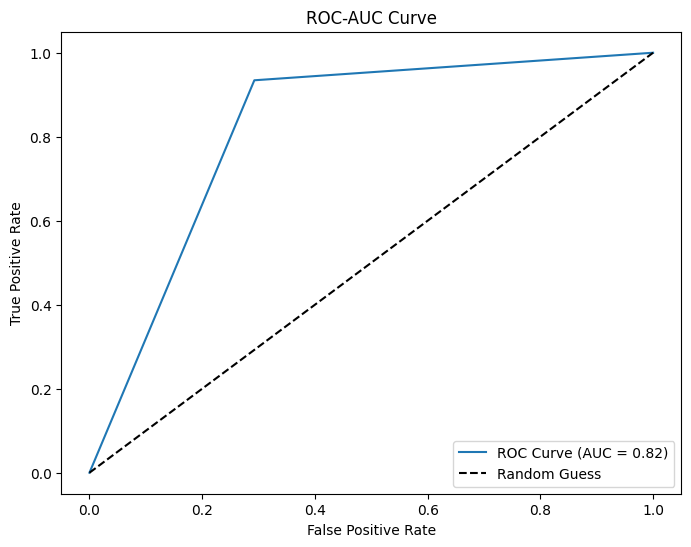

In [32]:
# Roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

## **KNN**

In [33]:
# make Knn model
Knn_model = KNeighborsClassifier(
    n_neighbors=9,
    n_jobs=-1
    )

Knn_model.fit(x_train, y_train)

y_pred = Knn_model.predict(x_test)
x_pred = Knn_model.predict(x_train)

print(f"Train Accuracy: {Knn_model.score(x_train, y_train):.2%}")
print(f"Test Accuracy: {Knn_model.score(x_test, y_test):.2%}")

print(classification_report(y_test, y_pred))

Train Accuracy: 84.33%
Test Accuracy: 83.61%
              precision    recall  f1-score   support

           0       0.84      0.66      0.73      3603
           1       0.84      0.93      0.88      6797

    accuracy                           0.84     10400
   macro avg       0.84      0.79      0.81     10400
weighted avg       0.84      0.84      0.83     10400



ROC-AUC Score: 0.7937


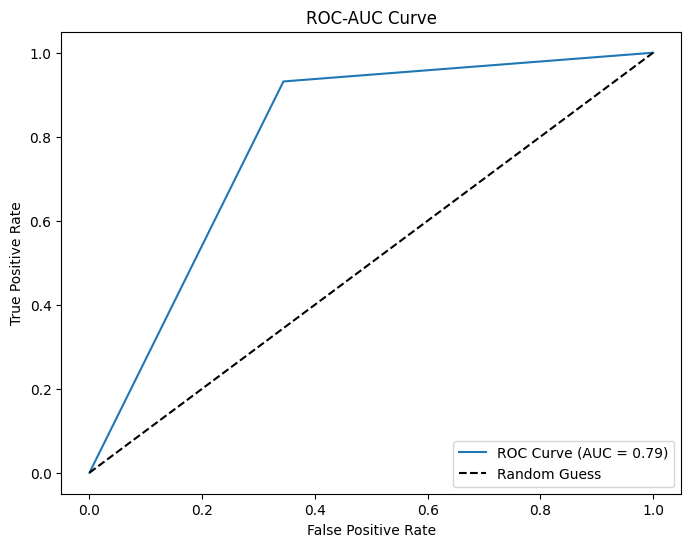

In [34]:
# Roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

**Xgboost**

In [35]:
xgboost_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
  )

xgboost_model.fit(x_train, y_train)

y_pred = xgboost_model.predict(x_test)
x_pred = xgboost_model.predict(x_train)

print(f"Train Accuracy: {xgboost_model.score(x_train, y_train):.2%}")
print(f"Test Accuracy: {xgboost_model.score(x_test, y_test):.2%}")

print(classification_report(y_test, y_pred))


Train Accuracy: 85.49%
Test Accuracy: 85.57%
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      3603
           1       0.86      0.93      0.89      6797

    accuracy                           0.86     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.86      0.86      0.85     10400



In [ ]:
# Roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

**SVC**

In [36]:
svc_model = SVC(
    kernel='linear',
    random_state=42
    )
svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)
x_pred = svc_model.predict(x_train)

print(f"Train Accuracy: {svc_model.score(x_train, y_train):.2%}")
print(f"Test Accuracy: {svc_model.score(x_test, y_test):.2%}")

print(classification_report(y_test, y_pred))

Train Accuracy: 84.78%
Test Accuracy: 85.52%
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      3603
           1       0.86      0.93      0.89      6797

    accuracy                           0.86     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.85      0.86      0.85     10400



ROC-AUC Score: 0.8200


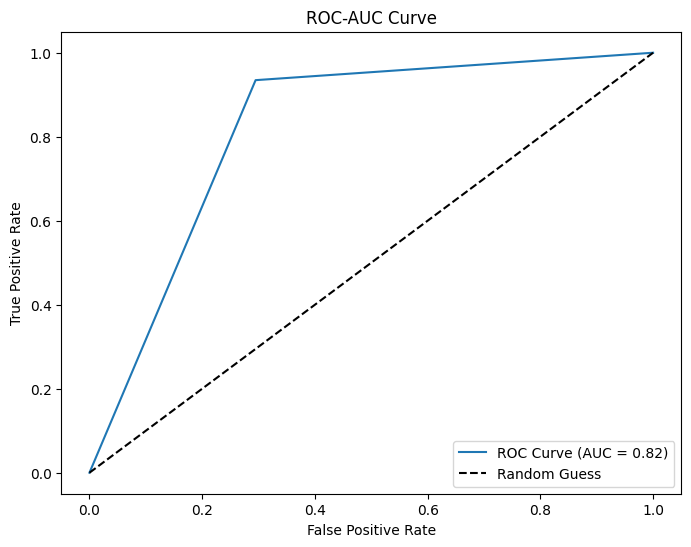

In [37]:
# Roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

## **Compare the different Model**

In [38]:
import plotly.graph_objects as go

# Create a dataframe to store the results
results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Svc'],
    'train_acc': [accuracy_score(y_train, logic_model.predict(x_train)),
                  accuracy_score(y_train, Knn_model.predict(x_train)),
                  accuracy_score(y_train, DecisionTree_model.predict(x_train)),
                  accuracy_score(y_train, randomforest_model.predict(x_train)),
                  accuracy_score(y_train, xgboost_model.predict(x_train)),
                  accuracy_score(y_train, svc_model.predict(x_train))],

    'test_acc': [accuracy_score(y_test, logic_model.predict(x_test)),
                 accuracy_score(y_test, Knn_model.predict(x_test)),
                 accuracy_score(y_test, DecisionTree_model.predict(x_test)),
                 accuracy_score(y_test, randomforest_model.predict(x_test)),
                 accuracy_score(y_test, xgboost_model.predict(x_test)),
                 accuracy_score(y_test, svc_model.predict(x_test))]
}
results_df = pd.DataFrame(results)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=results_df['Model'],
    y=results_df['train_acc'],
    name='Train Accuracy'
))

fig.add_trace(go.Bar(
    x=results_df['Model'],
    y=results_df['test_acc'],
    name='Test Accuracy'
))

fig.update_layout(
    barmode='group',
    title="Train vs Test Accuracy by Model",
    xaxis_title="Model",
    yaxis_title="Accuracy",
    yaxis=dict(range=[0.5, 1.0])
)

fig.show()


================ LogisticRegression ================



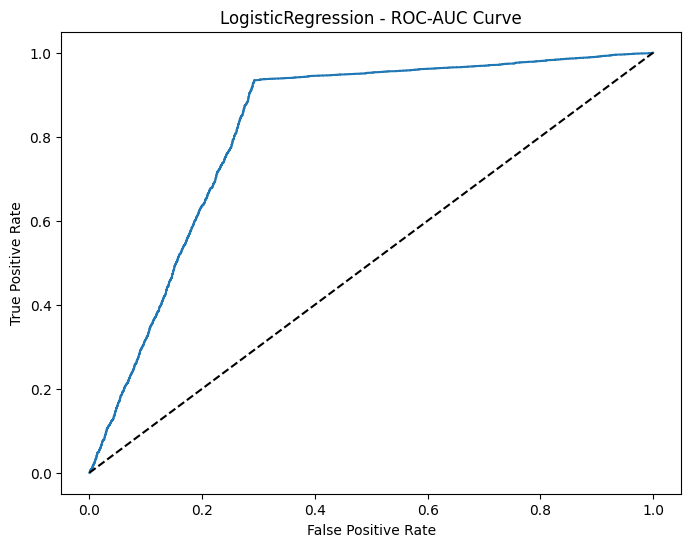

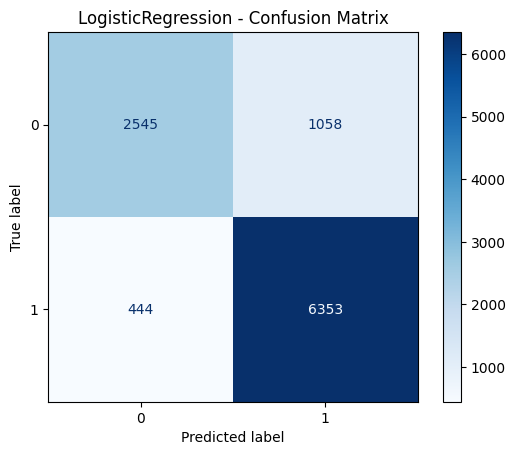


================ DecisionTree ================



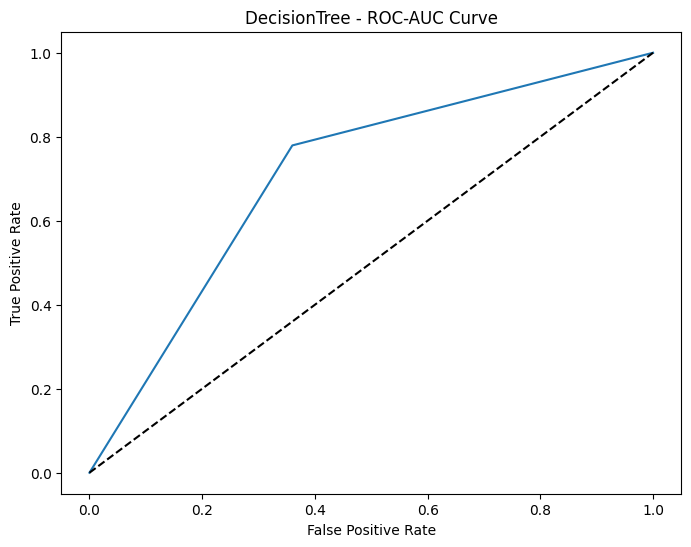

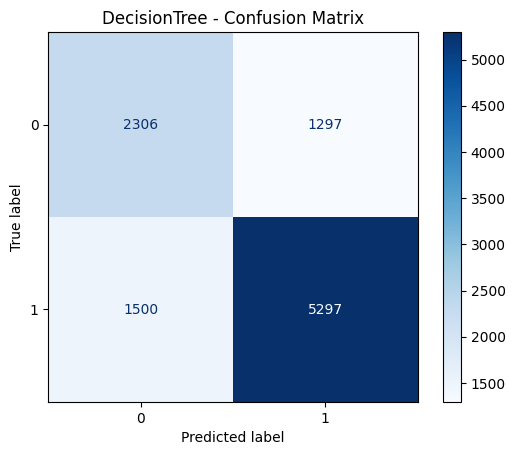

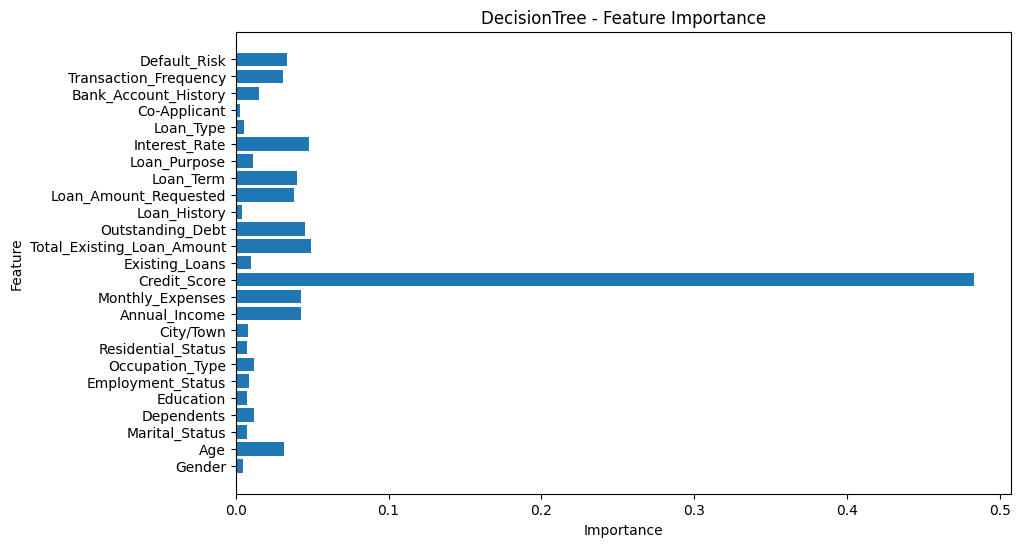


================ RandomForest ================



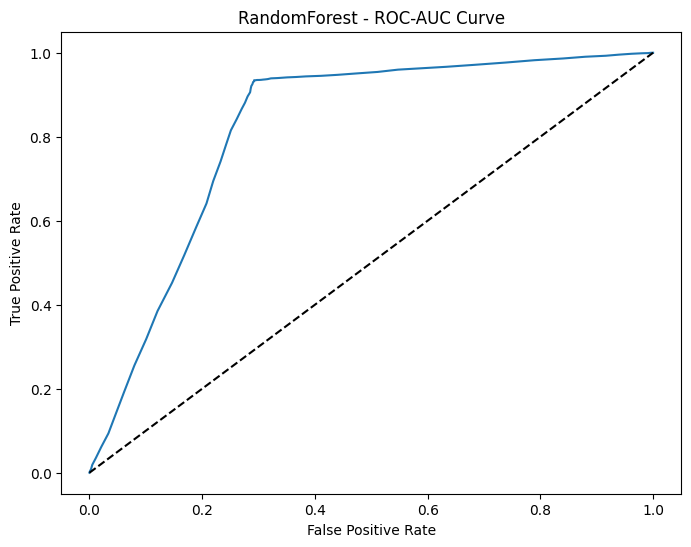

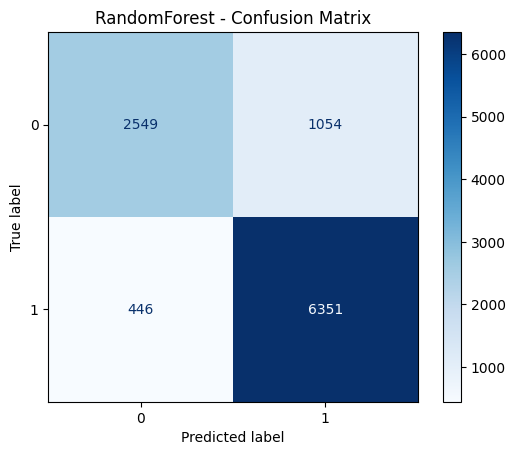

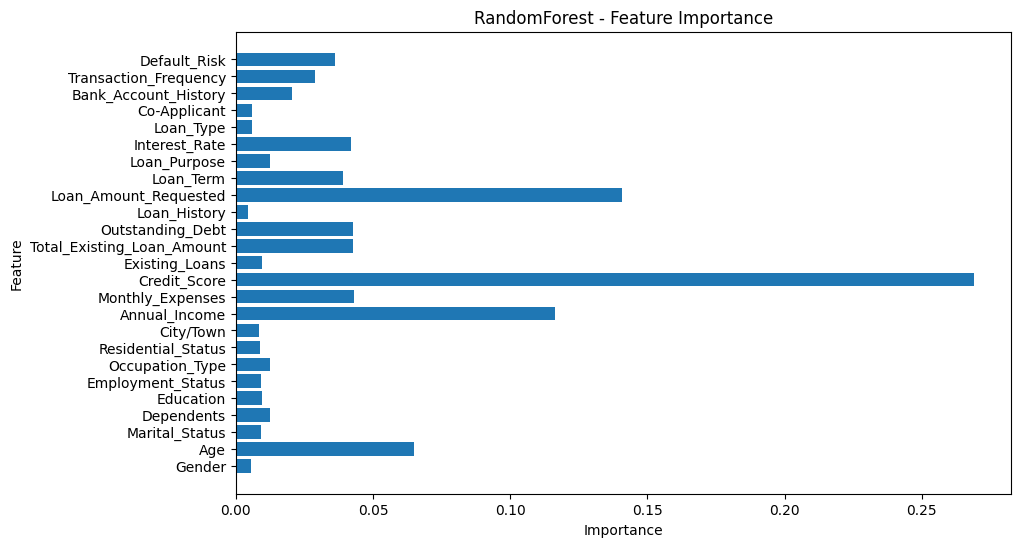


================ KNN ================



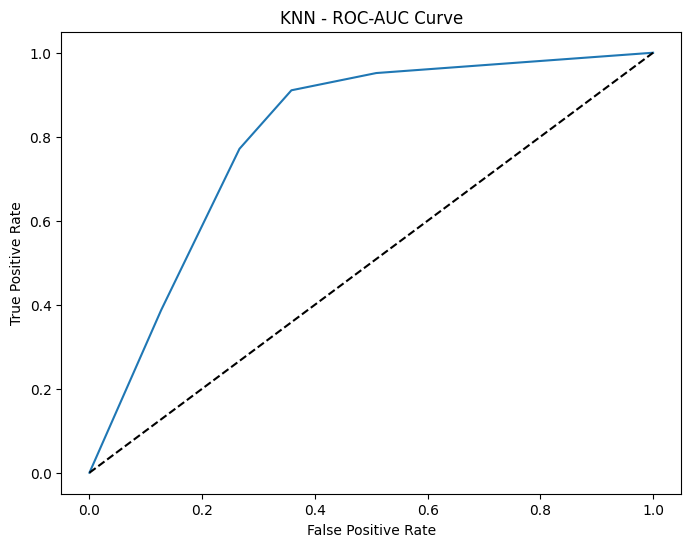

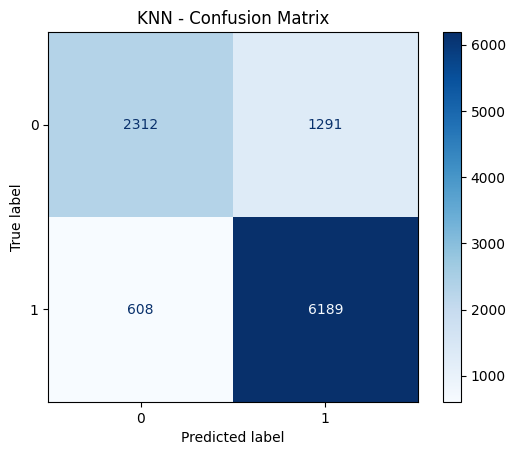


================ XGBoost ================



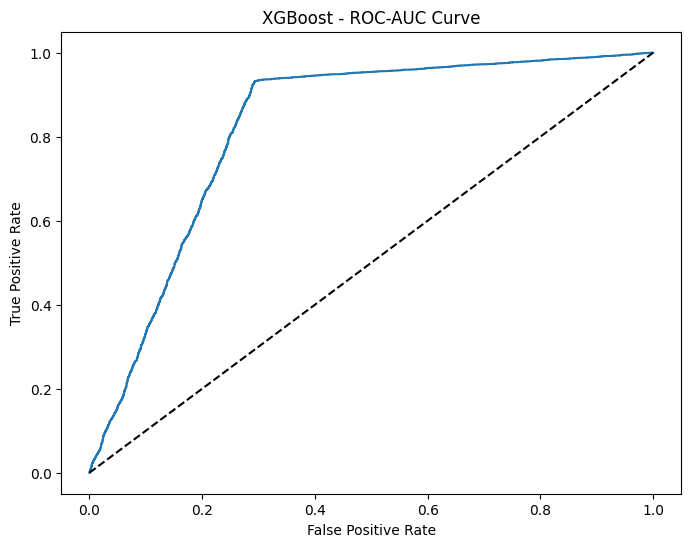

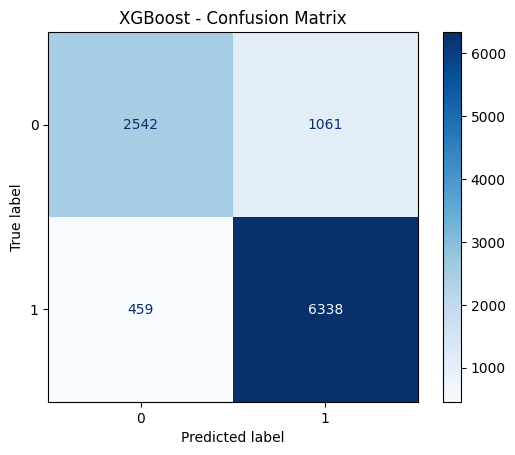

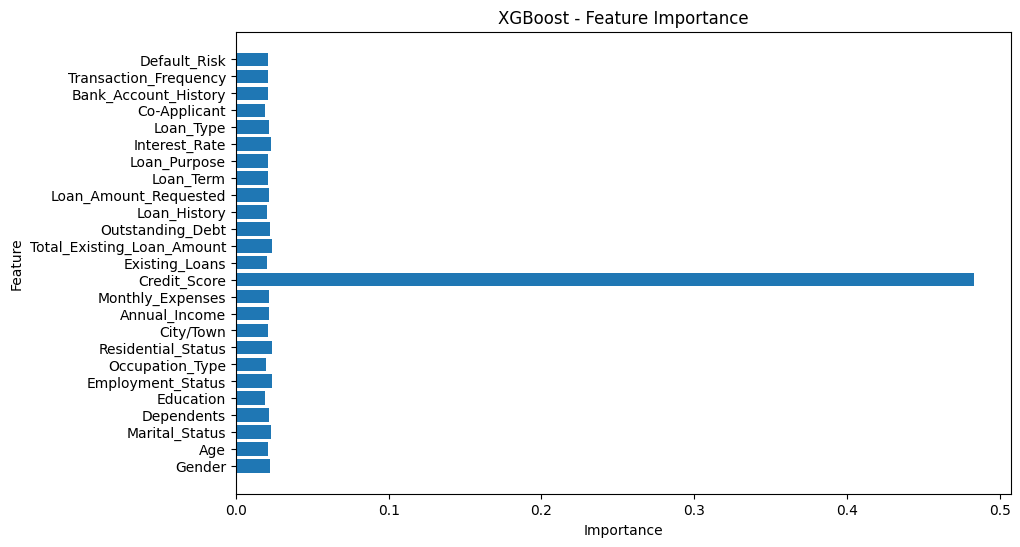


================ SVC ================



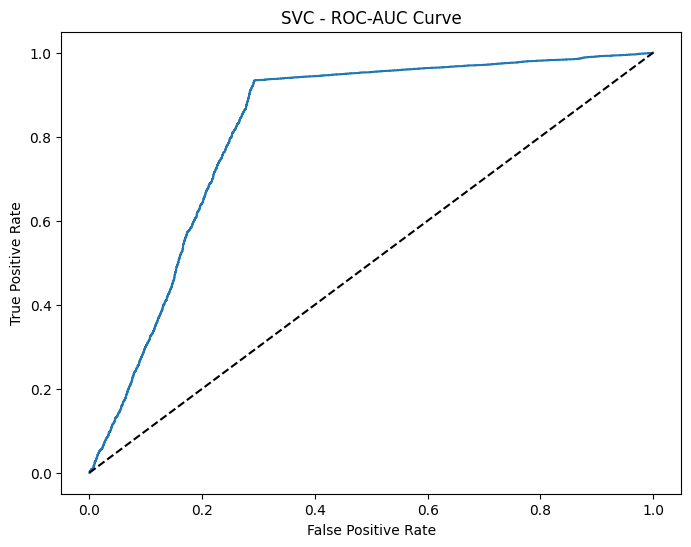

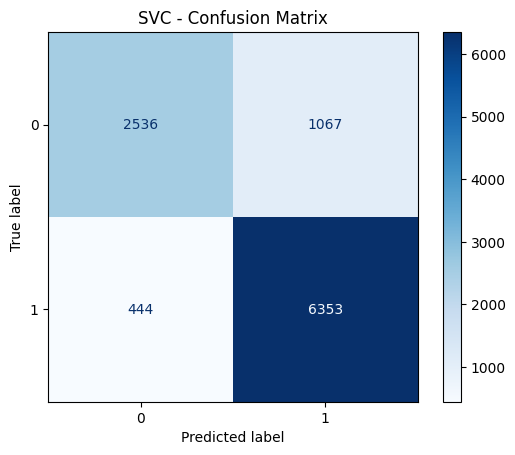

In [41]:
# ============================================
# 📊 Visualization & Results Saving (Multiple Models)
# ============================================

import os
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report, accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

os.makedirs("images", exist_ok=True)

results_file = "results.txt"
with open(results_file, "w", encoding="utf-8") as f:
    f.write("📊 Credit Scoring Model - Results\n")
    f.write("="*50 + "\n\n")

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC()
}

# Get feature names from original DataFrame before scaling
feature_names = x.columns

for name, model in models.items():
    print(f"\n================ {name} ================\n")

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(x_test)
    else:
        y_pred_proba = y_pred

    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC-AUC Curve")
    plt.savefig(f"images/{name}_roc_auc.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.savefig(f"images/{name}_confusion_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Feature Importance
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_

        plt.figure(figsize=(10,6))
        plt.barh(feature_names, importances)
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title(f"{name} - Feature Importance")
        plt.savefig(f"images/{name}_feature_importance.png", dpi=300, bbox_inches="tight")
        plt.show()

    with open(results_file, "a", encoding="utf-8") as f:
        f.write(f"===== {name} =====\n")
        f.write(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
        f.write(f"ROC-AUC: {auc_score:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(classification_report(y_test, y_pred))
        f.write("\n" + "-"*50 + "\n\n")